# <font color='blue'>1. Exploratory Data Analysis

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import EDA

In [110]:
EDA.explore()

Maths dataset has: '395' observations & '33' Attributes including target and has '0' missing values 
Portuguese dataset has: '649' observations & '33' Attributes including target and has '0' missing values 


In [111]:
EDA.stats_num()

,Mean,Median,Minimum,Maximum,Variance,Std_Dev,Skewness,Kurtosis
age,16.81,17.0,15,22,1.61,1.27,0.42,-0.03
Medu,2.49,2.0,0,4,1.28,1.13,-0.01,-1.25
Fedu,2.29,2.0,0,4,1.20,1.09,0.23,-1.09
traveltime,1.56,1.0,1,4,0.55,0.74,1.25,1.16
studytime,1.93,2.0,1,4,0.68,0.83,0.70,0.04
failures,0.33,0.0,0,3,0.51,0.72,2.36,5.11
famrel,3.94,4.0,1,5,0.89,0.94,-1.11,1.42
freetime,3.18,3.0,1,5,1.12,1.06,-0.19,-0.43
goout,3.17,3.0,1,5,1.35,1.16,-0.00,-0.83
Dalc,1.50,1.0,1,5,0.86,0.93,2.12,4.23


In [112]:
EDA.stats_cat()

,Unique_Count,Categories,Top_Category,Top_Count,Total_Count
school,2,"[GP, MS]",GP,434,662
sex,2,"[F, M]",F,390,662
address,2,"[U, R]",U,461,662
famsize,2,"[GT3, LE3]",GT3,461,662
Pstatus,2,"[A, T]",T,579,662
Mjob,5,"[at_home, health, other, services, teacher]",other,259,662
Fjob,5,"[teacher, other, services, health, at_home]",other,373,662
reason,4,"[course, other, home, reputation]",course,288,662
guardian,3,"[mother, father, other]",mother,453,662
schoolsup,2,"[yes, no]",no,592,662


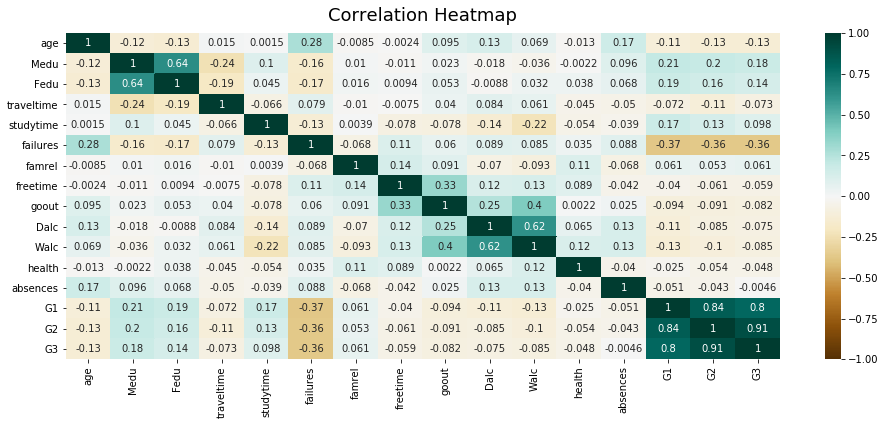

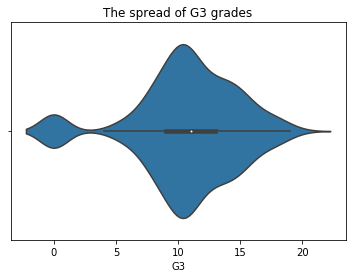

In [113]:
EDA.initialplots()

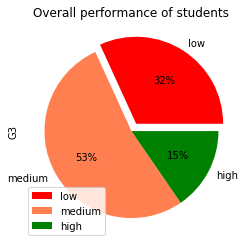

In [114]:
EDA.pieplot()

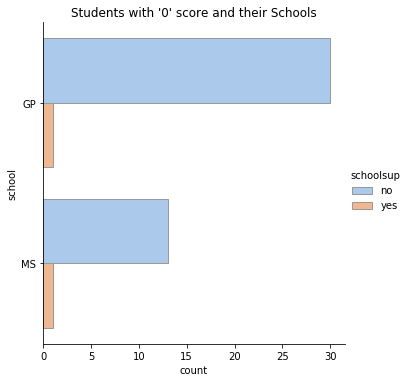

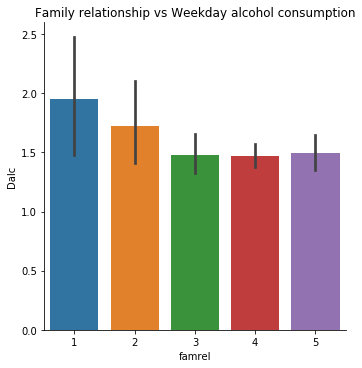

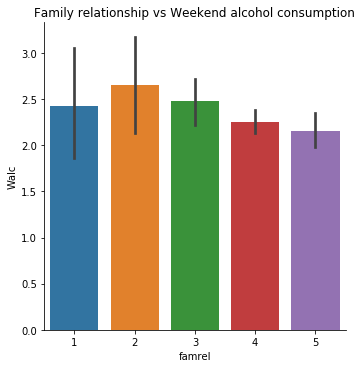

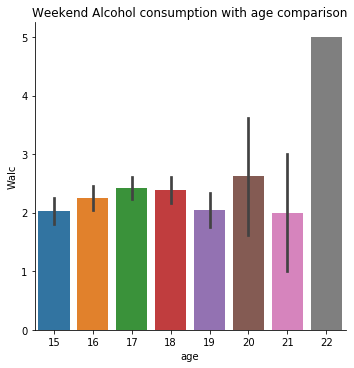

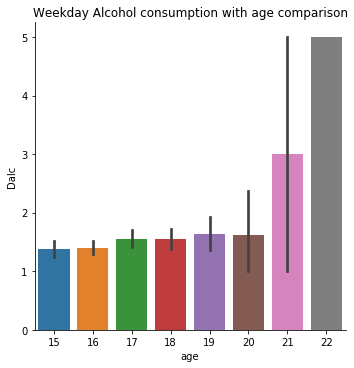

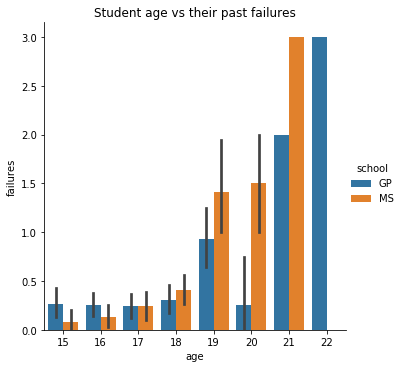

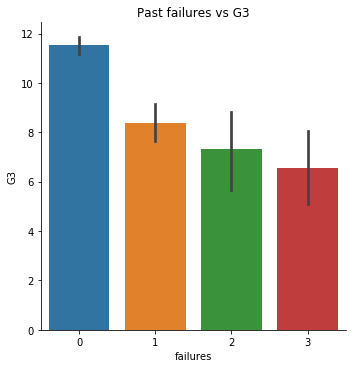

In [115]:
EDA.barplots()

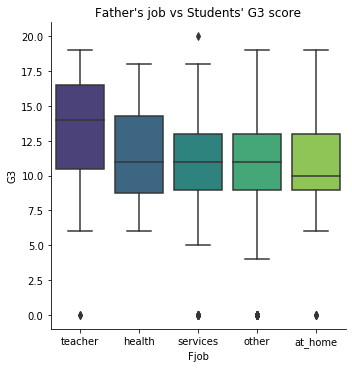

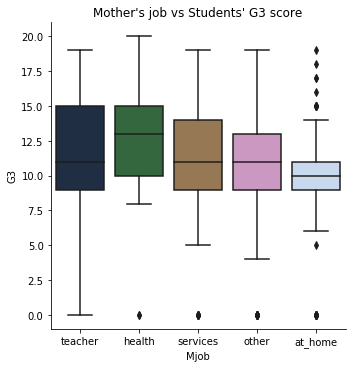

In [116]:
EDA.boxplots()

# Supervised Learning Approaches - Building the Predictive Models

# <font color='blue'>2 . Random Forest Regression

In [117]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

#Defining features(X) and Label(y)
X=EDA.df.drop(['G3','G3_binned'],axis=1)
y_reg=EDA.df["G3"]
#Splitting the data into training(67%) and test(33%)
X_train, X_test, y_train, y_test = train_test_split(X,y_reg,test_size=0.33) 

# Scaling the features (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

regressor=RandomForestRegressor(n_estimators=150, random_state = 0) #defining the model
rf_model = regressor.fit(X_train,y_train) #fitting the model with training dataset (features with label)
y_pred = rf_model.predict(X_test) #Evaluating the model using test dataset(features).

# <font color='green'> Evaluating the RF regression model:

In [118]:
from sklearn. model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.inspection import permutation_importance

#Finding Accuracy using Cross Validation
scores = cross_val_score(rf_model, X_train, y_train, cv=10)
acc = round(scores.mean()*100,2) 

r2 = round(r2_score(y_test, y_pred),2) #Finding R-square value for the prediction model
adj_r2 = round(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)),2)#Calculating adjusted R-square value.
mse = round(mean_squared_error(y_test, y_pred),2)#estimating Mean Squared Error
rmse = round((mse ** 0.5),2)

print("Random Forest Regression Model Evaluation:")
print("*****************************************")
print(f"""R-square: {r2}
Adjusted R-square: {adj_r2}
Mean Square Error: {mse}
Root Mean Square Error: {rmse}
Accuracy: {acc}% """)

Random Forest Regression Model Evaluation:
*****************************************
R-square: 0.87
Adjusted R-square: 0.85
Mean Square Error: 2.16
Root Mean Square Error: 1.47
Accuracy: 83.31% 


# <font color='green'>RF Regression - Feature Importance:

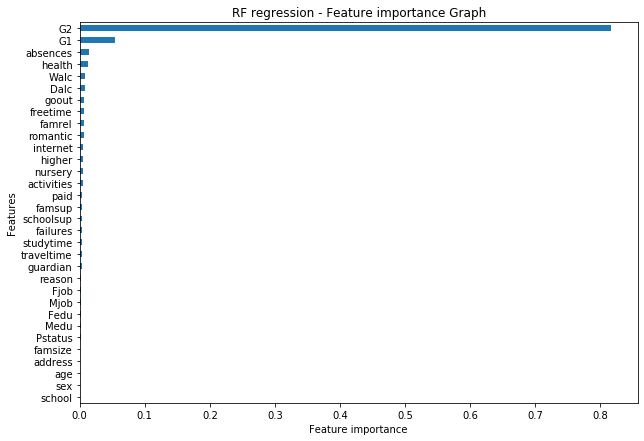

In [119]:
from sklearn.inspection import permutation_importance

importances = regressor.feature_importances_
indices = np.argsort(importances)
features = EDA.df.columns[0:32]
s1 = pd.Series(importances[indices],features,name="Importance")
s1.sort_values(ascending=False)

plt.figure(figsize=(10,7))
s1.plot(kind='barh')
plt.title("RF regression - Feature importance Graph")
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

Text(0, 0.5, 'Predicted values')

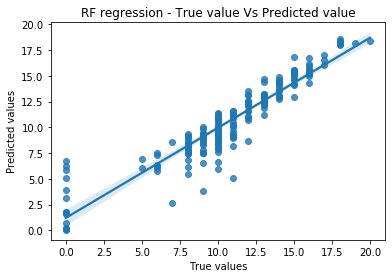

In [120]:
# Comparing True value and predicted value
sns.regplot(y_test,y_pred)
plt.title("RF regression - True value Vs Predicted value")
plt.xlabel("True values")
plt.ylabel("Predicted values")

# <font color='blue'>3. CLASSIFICATION:

In [121]:
#Based on Final Grades G3, students have been classified into 'Low', 'Medium' and 'High' as part of EDA.
EDA.df["G3_binned"]

0         low
1         low
2         low
3      medium
4         low
        ...  
610       low
611    medium
618    medium
632       low
642    medium
Name: G3_binned, Length: 662, dtype: category
Categories (3, object): [low < medium < high]

# 3.1 Examining the distribution of Classes

Text(3.674999999999997, 0.5, 'Count')

<Figure size 504x216 with 0 Axes>

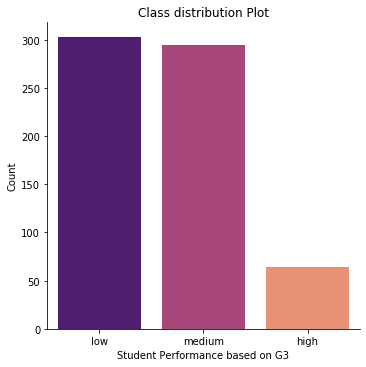

In [122]:
#Class distribution plot
plt.figure(figsize=(7, 3))
sns.catplot(x='G3_binned', kind="count", palette="magma", data=EDA.df)
plt.title("Class distribution Plot")
plt.xlabel("Student Performance based on G3")
plt.ylabel("Count")

# 3.2 Handling Class Imbalance Problem

# 3.2.1 Technique1 - randomoversampler from imblearn library

In [123]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

y=EDA.df["G3_binned"]

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_ros))

Original dataset shape: Counter({'low': 303, 'medium': 295, 'high': 64})
Resample dataset shape: Counter({'low': 303, 'medium': 303, 'high': 303})


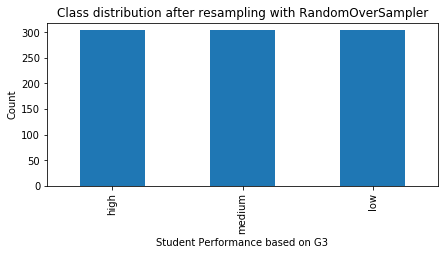

In [124]:
#Class distribution plot after resampling with RandomOverSampler
plt.figure(figsize=(7, 3))
plt.title("Class distribution after resampling with RandomOverSampler")
plt.xlabel("Student Performance based on G3")
plt.ylabel("Count")
y_ros.value_counts().plot(kind='bar')

# 3.2.2 Technique2 - SMOTE

In [125]:
from imblearn.over_sampling import SMOTE

y=EDA.df["G3_binned"]
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)
print("Before Resampling:", Counter(y))
print("After Resampling:", Counter(y_smote))

Before Resampling: Counter({'low': 303, 'medium': 295, 'high': 64})
After Resampling: Counter({'low': 303, 'medium': 303, 'high': 303})


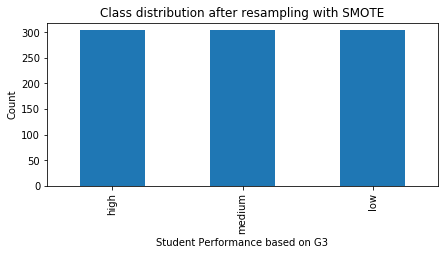

In [126]:
#Class distribution plot after resampling with Synthetic Minority Oversampling Technique(SMOTE)
plt.figure(figsize=(7, 3))
plt.title("Class distribution after resampling with SMOTE")
plt.xlabel("Student Performance based on G3")
plt.ylabel("Count")
y_smote.value_counts().plot(kind='bar')

# 3.3 Building Classification Models

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

#Defining function to update classification reports in pandas dataframes
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report
    return df_classification_report

#Splitting resampled data from RandomOverSampler for testing and training
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_ros,y_ros,test_size=0.33)

#Splitting resampled data from SMOTE for testing and training
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_smote,y_smote,test_size=0.33)

# 3.3.1 Support Vector Machine

In [128]:
from sklearn.svm import SVC

<font color='green'>Building and Training of SVM model:
    ===

In [129]:
#Initialising the model
svm =  SVC(random_state=1)
#Fitting SVM model using resampled data from ROS
svm_grid_model = svm.fit(X_train1,y_train1)

#Fitting SVM model using resampled data from SMOTE
svm_grid_model1 = svm.fit(X_train2,y_train2)

pred_svm = svm_grid_model.predict(X_test1) #Predicting class from test data resampled with ROS
pred_svm1 = svm_grid_model1.predict(X_test2) #Predicting class from test data resampled with SMOTE

#Evaluating the model before GridSearchCV:
scores = cross_val_score(svm_grid_model, X_train1, y_train1, cv=5)
scores1 = cross_val_score(svm_grid_model1, X_train2, y_train2, cv=5)

print("Accuracy of SVM model (data resampled by ROS) before tuning parameters:",round(scores.mean()*100,2),"%")
print("Accuracy of SVM model (data resampled by SMOTE) before tuning parameters:",round(scores1.mean()*100,2),"%")

Accuracy of SVM model (data resampled by ROS) before tuning parameters: 88.67 %
Accuracy of SVM model (data resampled by SMOTE) before tuning parameters: 89.49 %


HyperParameter Tuning Using GridsearchCV - Support Vector Machine

<font color='red'>Please Note that the below Cell has been disabled inorder to save running time.
    The screenshot of relevant output is found in the APPENDIX section of report</font>

In [130]:
# defining parameter range
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
 #             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
  #            'kernel': ['rbf']}
#cv_svc = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)
#cv_svc.fit(X_train1, y_train1)

In [131]:
#cv_svc.best_params_

Hyperparameter Tuned Model:

In [132]:
#Initializing SVC model with tuned hyperparametes
svc = SVC(kernel='rbf', C=1, gamma=0.1, random_state=1)

#Fitting SVM model using resampled data from ROS
svc_model = svc.fit(X_train1,y_train1)

#Fitting SVM model using resampled data from SMOTE
svc_model1 = svc.fit(X_train2,y_train2)

<font color='green'>Evaluating SVM model:
==============

In [133]:
#Evaluating the model After GridSearchCV:
scores_svm = cross_val_score(svc_model, X_train1, y_train1, cv=5)
scores_svm1 = cross_val_score(svc_model1, X_train2, y_train2, cv=5)
print("Accuracy of SVC model (data resampled by ROS) after tuning parameters:",round(scores_svm.mean()*100,2),"%")
print("Accuracy of SVC model (data resampled by SMOTE) after tuning parameters:",round(scores_svm1.mean()*100,2),"%")

Accuracy of SVC model (data resampled by ROS) after tuning parameters: 88.18 %
Accuracy of SVC model (data resampled by SMOTE) after tuning parameters: 88.18 %


Evaluation Metrics for SVC model built using data resampled by RandomOverSampler:


,precision,recall,f1-score,support
high,0.977273,0.895833,0.934783,96.000000
low,0.864865,0.969697,0.914286,99.000000
medium,0.970297,0.933333,0.951456,105.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.937478,0.932955,0.933508,300.000000
weighted avg,0.937737,0.933333,0.933854,300.000000


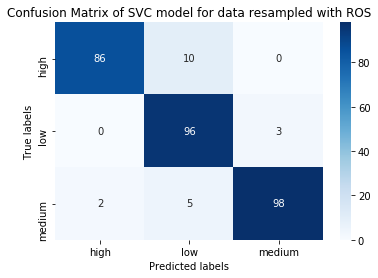

In [134]:
predict_svc = svc_model.predict(X_test1) #Predicting class from test data resampled with ROS
predict_svc1 = svc_model.predict(X_test2) #Predicting class from test data resampled with SMOTE

#Defining variables for confusion matrices:
SVC_ros_conf = confusion_matrix(y_test1,predict_svc) #RFC model for data resampled with ROS
SVC_smote_conf = confusion_matrix(y_test2,predict_svc1) #RFC model for data resampled with SMOTE

#Plotting Confusion Matrix
ax= plt.subplot()
sns.heatmap(SVC_ros_conf, annot=True, fmt='g', ax=ax,cmap='Blues');  #annot=True to annotate cells, fmt='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of SVC model for data resampled with ROS')
ax.xaxis.set_ticklabels(['high', 'low','medium'])
ax.yaxis.set_ticklabels(['high', 'low', 'medium']);

#Calling get_classification_report function to print the evaluation metrics:
SVC_ros = get_classification_report(y_test1,predict_svc) #SVC model for data resampled with ROS
print("================================================================================")
print("Evaluation Metrics for SVC model built using data resampled by RandomOverSampler:")
print("================================================================================")
SVC_ros

Evaluation Metrics for SVC model built using data resampled by SMOTE:


,precision,recall,f1-score,support
high,0.969388,0.940594,0.954774,101.000000
low,0.833333,0.896226,0.863636,106.000000
medium,0.863636,0.817204,0.839779,93.000000
accuracy,0.886667,0.886667,0.886667,0.886667
macro avg,0.888786,0.884675,0.886063,300.000000
weighted avg,0.888532,0.886667,0.886924,300.000000


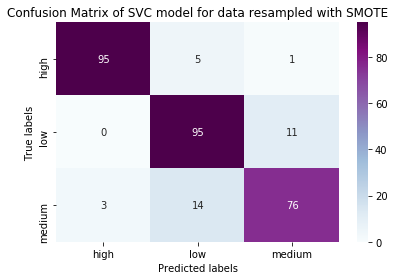

In [135]:
ax= plt.subplot()
sns.heatmap(SVC_smote_conf, annot=True, fmt='g', ax=ax,cmap='BuPu');  #annot=True to annotate cells, fmt='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of SVC model for data resampled with SMOTE')
ax.xaxis.set_ticklabels(['high', 'low','medium'])
ax.yaxis.set_ticklabels(['high', 'low', 'medium']);
plt.tight_layout()

#Calling get_classification_report function to print the evaluation metrics:
SVC_smote = get_classification_report(y_test2,predict_svc1) #SVC model for data resampled with SMOTE
print("====================================================================")
print("Evaluation Metrics for SVC model built using data resampled by SMOTE:")
print("====================================================================")
SVC_smote

# 3.3.2 Random Forest Classification

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
##Initialising the model
rfc =  RandomForestClassifier(random_state=42)

#Fitting RFC model using resampled data from ROS
rfc_gridmodel = rfc.fit(X_train1, y_train1)
#Fitting RFC model using resampled data from SMOTE
rfc_gridmodel1 = rfc.fit(X_train2, y_train2)

pred_rfc = rfc_gridmodel.predict(X_test1) #Predicting class from test data resampled with ROS
pred_rfc1 = rfc_gridmodel1.predict(X_test2) #Prediezfcx cting class from test data resampled with SMOTE

#Evaluating the model before GridSearchCV:
scores = cross_val_score(rfc_gridmodel, X_train1, y_train1, cv=5)
scores1 = cross_val_score(rfc_gridmodel1, X_train2, y_train2, cv=5)
print("Accuracy of RFC model (data resampled by ROS) before tuning parameters:",round(scores.mean()*100,2),"%")
print("Accuracy of RFC model (data resampled by SMOTE) before tuning parameters:",round(scores1.mean()*100,2),"%")

Accuracy of RFC model (data resampled by ROS) before tuning parameters: 92.29 %
Accuracy of RFC model (data resampled by SMOTE) before tuning parameters: 91.62 %


Parameter Tuning using GridSearchCV - RandomForestClassifier

<font color='red'>Please Note that the below Cell has been disabled inorder to save running time.
    The screenshot of relevant output is found in the APPENDIX section of report</font>

In [138]:
##Fitting the GridsearchCV with estimator 'rfc' and training data
#param_grid = {'n_estimators': [200, 500, 700],'max_features': ['auto', 'log2'],'max_depth' : [6,7,8],'criterion' :['gini', 'entropy']}
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
#CV_rfc.fit(X_train1, y_train1)

In [139]:
#Finding best parameters for our RF model.
#CV_rfc.best_params_

<font color='green'>Building and Training of RFC model:
    ======

In [140]:
#Initialising new estimator(model) with the best parameter values recommended by GridSearchCV
rd =  RandomForestClassifier(criterion= 'gini', max_depth=7, max_features='auto', n_estimators=500, random_state=42) #HyperParameter_Tuning

#Fitting RF model using resampled data from ROS:
rd_model = rd.fit(X_train1,y_train1)

#Fitting RF model using resampled data from SMOTE:
rd_model1 = rd.fit(X_train2,y_train2)

<font color='green'> Evaluating RFC Model:
    ===========

In [158]:
#Evaluating the model After GridSearchCV:
scores_rd = cross_val_score(rd_model, X_train1, y_train1, cv=5)
scores_rd1 = cross_val_score(rd_model1, X_train2, y_train2, cv=5)
print("Accuracy of RFC model (data resampled by ROS) after tuning parameters:",round(scores_rd.mean()*100,2),"%")
print("Accuracy of RFC model (data resampled by SMOTE) after tuning parameters:",round(scores_rd1.mean()*100,2),"%")

Accuracy of RFC model (data resampled by ROS) after tuning parameters: 91.3 %
Accuracy of RFC model (data resampled by SMOTE) after tuning parameters: 91.62 %


Evaluation Metrics for RFC model built using data resampled by RandomOverSampler:


,precision,recall,f1-score,support
high,0.968750,0.968750,0.968750,96.00
low,0.941176,0.969697,0.955224,99.00
medium,0.941176,0.914286,0.927536,105.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950368,0.950911,0.950503,300.00
weighted avg,0.950000,0.950000,0.949862,300.00


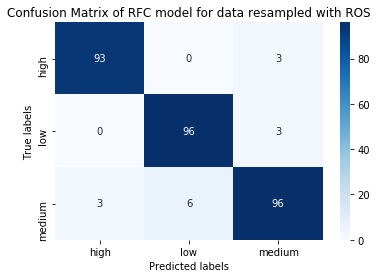

In [142]:
predict_rd = rd_model.predict(X_test1) #Predicting class from test data resampled with ROS
predict_rd1 = rd_model.predict(X_test2) #Predicting class from test data  resampled with SMOTE

#Defining variables for confusion matrices:
RFC_ros_conf = confusion_matrix(y_test1,predict_rd)
RFC_smote_conf = confusion_matrix(y_test2,predict_rd1)

#Plotting Confusion Matrix
ax= plt.subplot()
sns.heatmap(RFC_ros_conf, annot=True, fmt='g', ax=ax,cmap='Blues');  #annot=True to annotate cells, fmt='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of RFC model for data resampled with ROS')
ax.xaxis.set_ticklabels(['high', 'low','medium'])
ax.yaxis.set_ticklabels(['high', 'low', 'medium']);

#Calling get_classification_report function to print the evaluation metrics:
RFC_ros = get_classification_report(y_test1,predict_rd) 
print("================================================================================")
print("Evaluation Metrics for RFC model built using data resampled by RandomOverSampler:")
print("================================================================================")
RFC_ros

Evaluation Metrics for RFC model built using data resampled by SMOTE:


,precision,recall,f1-score,support
high,0.942857,0.980198,0.961165,101.000000
low,0.904762,0.896226,0.900474,106.000000
medium,0.855556,0.827957,0.841530,93.000000
accuracy,0.903333,0.903333,0.903333,0.903333
macro avg,0.901058,0.901460,0.901056,300.000000
weighted avg,0.902333,0.903333,0.902634,300.000000


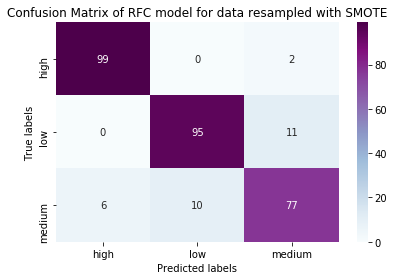

In [143]:
ax= plt.subplot()
sns.heatmap(RFC_smote_conf, annot=True, fmt='g', ax=ax,cmap='BuPu');  #annot=True to annotate cells, fmt='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of RFC model for data resampled with SMOTE')
ax.xaxis.set_ticklabels(['high', 'low','medium'])
ax.yaxis.set_ticklabels(['high', 'low', 'medium']);
plt.tight_layout()

#Calling get_classification_report function to print the evaluation metrics:
RFC_smote = get_classification_report(y_test2,predict_rd1)
print("====================================================================")
print("Evaluation Metrics for RFC model built using data resampled by SMOTE:")
print("====================================================================")
RFC_smote

# 3.3.3 Multi-Layer Perceptron Neural Network

<font color='green'>Building and Training of MLP Neural network model:
    ======

In [144]:
from sklearn.neural_network import MLPClassifier

In [145]:
##Initialising the model
mlpnn =  MLPClassifier(max_iter = 1200,random_state=7)

#Fitting RFC model using resampled data from ROS
mlp_gridmodel = mlpnn.fit(X_train1, y_train1)
#Fitting RFC model using resampled data from SMOTE
mlp_gridmodel1 = mlpnn.fit(X_train2, y_train2)

pred_mlpnn = mlp_gridmodel.predict(X_test1) #Predicting class from test data resampled with ROS
pred_mlpnn1 = mlp_gridmodel1.predict(X_test2) #Predicting class from test data resampled with SMOTE

In [146]:
#Evaluating the model before GridSearchCV:
scores = cross_val_score(mlp_gridmodel, X_train1, y_train1, cv=5)
scores1 = cross_val_score(mlp_gridmodel1, X_train2, y_train2, cv=5)
print("Accuracy of MLP model (data resampled by ROS) before tuning parameters:",round(scores.mean()*100,2),"%")
print("Accuracy of MLP model (data resampled by SMOTE) before tuning parameters:",round(scores1.mean()*100,2),"%")

Accuracy of MLP model (data resampled by ROS) before tuning parameters: 86.2 %
Accuracy of MLP model (data resampled by SMOTE) before tuning parameters: 85.56 %


Hyperparameter Tuning using GridSearchCV - MLP Neural Network

<font color='red'>Please Note that the below Cell has been disabled inorder to save running time.
    The screenshot of relevant output is found in the APPENDIX section of report</font>

In [147]:
##Fitting the GridsearchCV with estimator 'rfc' and training data
#param_grid = {'hidden_layer_sizes': [(150,150,100)],'activation':['relu'], 'solver':['adam'],'max_iter': [500, 700, 1000, 1200,],'random_state' :[3,5,7,9]}
#CV_mlp = GridSearchCV(estimator=mlpnn, param_grid=param_grid, cv= 3)
#CV_mlp.fit(X_train1, y_train1)

In [148]:
#Finding best parameters for our RF model.
#CV_mlp.best_params_

In [149]:
#Initializing the MLP classifier model
classifier = MLPClassifier(hidden_layer_sizes=(150,150,100), max_iter=500,activation = 'relu',solver='adam',random_state=7)

#Fitting MLP model with resampled data from ROS:
mlp_model = classifier.fit(X_train1,y_train1)

#Fitting MLP model with resampled data from SMOTE:
mlp_model1 = classifier.fit(X_train2,y_train2)

<font color='green'>Evaluating the MLP Neural Network model:
    =======

In [150]:
#Evaluating the model After GridSearchCV:
scores_mlp = cross_val_score(mlp_model, X_train1, y_train1, cv=5)
scores_mlp1 = cross_val_score(mlp_model1, X_train2, y_train2, cv=5)
print("Accuracy of MLP model (data resampled by ROS) after tuning parameters:",round(scores_mlp.mean()*100,2),"%")
print("Accuracy of MLP model (data resampled by SMOTE) after tuning parameters:",round(scores_mlp1.mean()*100,2),"%")

Accuracy of MLP model (data resampled by ROS) after tuning parameters: 87.35 %
Accuracy of MLP model (data resampled by SMOTE) after tuning parameters: 88.18 %


Evaluation Metrics for MLP model built using data resampled by RandomOverSampler:


,precision,recall,f1-score,support
high,0.923077,1.000000,0.960000,96.000000
low,0.931373,0.959596,0.945274,99.000000
medium,0.957447,0.857143,0.904523,105.000000
accuracy,0.936667,0.936667,0.936667,0.936667
macro avg,0.937299,0.938913,0.936599,300.000000
weighted avg,0.937844,0.936667,0.935723,300.000000


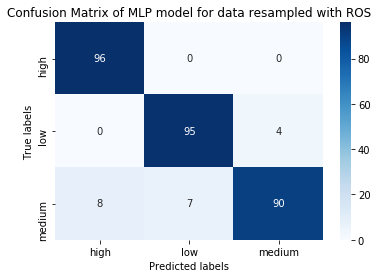

In [151]:
predict_mlp = mlp_model.predict(X_test1) #Predicting target from test data resampled with ROS
predict_mlp1 = mlp_model.predict(X_test2) #Predicting target from test data resampled with SMOTE

#Defining variables for confusion matrices:
MLP_ros_conf = confusion_matrix(y_test1,predict_mlp)
MLP_smote_conf = confusion_matrix(y_test2,predict_mlp1)

#Plotting Confusion Matrix
ax= plt.subplot()
sns.heatmap(MLP_ros_conf, annot=True, fmt='g', ax=ax,cmap='Blues');  #annot=True to annotate cells, fmt='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of MLP model for data resampled with ROS')
ax.xaxis.set_ticklabels(['high', 'low','medium'])
ax.yaxis.set_ticklabels(['high', 'low', 'medium']);

#Calling get_classification_report function to print the evaluation metrics:
MLP_ros = get_classification_report(y_test1,predict_mlp) 
print("================================================================================")
print("Evaluation Metrics for MLP model built using data resampled by RandomOverSampler:")
print("================================================================================")
MLP_ros

Evaluation Metrics for MLP model built using data resampled by SMOTE:


,precision,recall,f1-score,support
high,0.909910,1.000000,0.952830,101.00
low,0.902913,0.877358,0.889952,106.00
medium,0.848837,0.784946,0.815642,93.00
accuracy,0.890000,0.890000,0.890000,0.89
macro avg,0.887220,0.887435,0.886142,300.00
weighted avg,0.888505,0.890000,0.888085,300.00


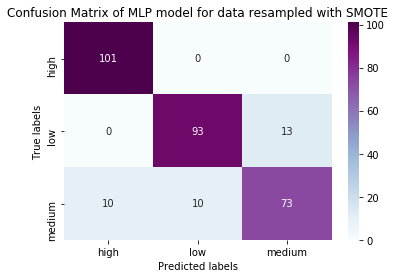

In [152]:
#Plotting Confusion Matrix
ax= plt.subplot()
sns.heatmap(MLP_smote_conf, annot=True, fmt='g', ax=ax,cmap='BuPu');  #annot=True to annotate cells, fmt='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of MLP model for data resampled with SMOTE')
ax.xaxis.set_ticklabels(['high', 'low','medium'])
ax.yaxis.set_ticklabels(['high', 'low', 'medium']);

#Calling get_classification_report function to print the evaluation metrics:
MLP_smote = get_classification_report(y_test2,predict_mlp1) 
print("====================================================================")
print("Evaluation Metrics for MLP model built using data resampled by SMOTE:")
print("====================================================================")
MLP_smote

# <font color='blue'>Comparison of classification models' performance

In [153]:
#Defining function to compare metrics of all three models
def compare(metric):
    SVC_ros.rename(columns = {'precision':'precision_SVC_ROS', 'recall':'recall_SVC_ROS', 'f1-score':'f1-score_SVC_ROS'}, inplace = True)
    SVC_smote.rename(columns = {'precision':'precision_SVC_SMOTE', 'recall':'recall_SVC_SMOTE', 'f1-score':'f1-score_SVC_SMOTE'}, inplace = True)
    RFC_ros.rename(columns = {'precision':'precision_RFC_ROS', 'recall':'recall_RFC_ROS', 'f1-score':'f1-score_RFC_ROS'}, inplace = True)
    RFC_smote.rename(columns = {'precision':'precision_RFC_SMOTE', 'recall':'recall_RFC_SMOTE', 'f1-score':'f1-score_RFC_SMOTE'}, inplace = True)
    MLP_ros.rename(columns = {'precision':'precision_MLP_ROS', 'recall':'recall_MLP_ROS', 'f1-score':'f1-score_MLP_ROS'}, inplace = True)
    MLP_smote.rename(columns = {'precision':'precision_MLP_SMOTE', 'recall':'recall_MLP_SMOTE', 'f1-score':'f1-score_MLP_SMOTE'}, inplace = True)
    df_svc = pd.merge(SVC_ros.drop('support',axis=1),SVC_smote.drop('support',axis=1),left_index=True,right_index=True)
    df_rfc = pd.merge(RFC_ros.drop('support',axis=1),RFC_smote.drop('support',axis=1),left_index=True,right_index=True)
    df_mlp = pd.merge(MLP_ros.drop('support',axis=1),MLP_smote.drop('support',axis=1),left_index=True,right_index=True)
    df_combo1 = pd.merge(df_svc,df_rfc,left_index=True,right_index=True)
    df_combo_all = pd.merge(df_combo1,df_mlp,left_index=True,right_index=True)
    filter_col = [col for col in df_combo_all if col.startswith(metric)]
    return(round(df_combo_all[filter_col],2))    

In [154]:
compare('precision')

,precision_SVC_ROS,precision_SVC_SMOTE,precision_RFC_ROS,precision_RFC_SMOTE,precision_MLP_ROS,precision_MLP_SMOTE
high,0.98,0.97,0.97,0.94,0.92,0.91
low,0.86,0.83,0.94,0.90,0.93,0.90
medium,0.97,0.86,0.94,0.86,0.96,0.85
accuracy,0.93,0.89,0.95,0.90,0.94,0.89
macro avg,0.94,0.89,0.95,0.90,0.94,0.89
weighted avg,0.94,0.89,0.95,0.90,0.94,0.89


In [155]:
compare('recall')

,recall_SVC_ROS,recall_SVC_SMOTE,recall_RFC_ROS,recall_RFC_SMOTE,recall_MLP_ROS,recall_MLP_SMOTE
high,0.90,0.94,0.97,0.98,1.00,1.00
low,0.97,0.90,0.97,0.90,0.96,0.88
medium,0.93,0.82,0.91,0.83,0.86,0.78
accuracy,0.93,0.89,0.95,0.90,0.94,0.89
macro avg,0.93,0.88,0.95,0.90,0.94,0.89
weighted avg,0.93,0.89,0.95,0.90,0.94,0.89


In [156]:
compare('f1')

,f1-score_SVC_ROS,f1-score_SVC_SMOTE,f1-score_RFC_ROS,f1-score_RFC_SMOTE,f1-score_MLP_ROS,f1-score_MLP_SMOTE
high,0.93,0.95,0.97,0.96,0.96,0.95
low,0.91,0.86,0.96,0.90,0.95,0.89
medium,0.95,0.84,0.93,0.84,0.90,0.82
accuracy,0.93,0.89,0.95,0.90,0.94,0.89
macro avg,0.93,0.89,0.95,0.90,0.94,0.89
weighted avg,0.93,0.89,0.95,0.90,0.94,0.89
